In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

# import data
csv_train = pd.read_csv('../input/labels.csv')  
csv_test = pd.read_csv('../input/sample_submission.csv')

Using TensorFlow backend.


In [2]:
# read training CSV
csv_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [3]:
# read test csv
csv_test.head(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
5,00225dcd3e4d2410dd53239f95c0352f,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
6,002c2a3117c2193b4d26400ce431eebd,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
7,002c58d413a521ae8d1a5daeb35fc803,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
8,002f80396f1e3db687c5932d7978b196,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
9,0036c6bcec6031be9e62a257b1c3c442,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [4]:
# Generate Labels
targets_series = pd.Series(csv_train['breed'])
# print(targets_series)
one_hot = pd.get_dummies(targets_series, sparse = True)
labels = np.asarray(one_hot)
n_check = random.randint(0, len(labels)-1)
print(csv_train['breed'][n_check], 'is encoded as', ''.join((str(i) for i in labels[n_check])))

great_pyrenees is encoded as 000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000


In [7]:
im_size = 100

# train contains 10222 images of dogs
x_train = []
y_train = []
x_test = []

In [8]:
for i, (f, breed) in enumerate(tqdm(csv_train.values)):
    img = cv2.imread('../input/train/{}.jpg'.format(f))
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(labels[i])

100%|██████████| 10222/10222 [00:24<00:00, 418.54it/s]


label: 000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000


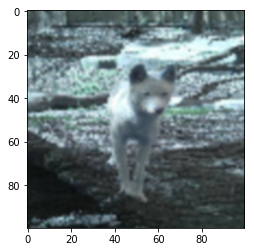

In [9]:
# check train
n_check = random.randint(0, len(y_train)-1)
print('label:', ''.join((str(i) for i in y_train[n_check])))
plt.imshow(x_train[n_check], cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [16]:
for f in tqdm(csv_test['id'].values):
    img = cv2.imread('../input/test/{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|██████████| 10357/10357 [00:31<00:00, 324.27it/s]


**TODO:** add data augmentation, rotate/zoom the photo to ingrease the data.

In [9]:
# build np array and normalise them
x_train_raw = np.array(x_train, np.float32) / 255.
y_train_raw = np.array(y_train, np.uint8)
x_test_raw  = np.array(x_test, np.float32) / 255.

In [10]:
print("x_train shape:", x_train_raw.shape)
print("y_train shape:", y_train_raw.shape)
print("x_test shape:", x_test_raw.shape)

x_train shape: (10222, 200, 200, 3)
y_train shape: (10222, 120)
x_test shape: (10357, 200, 200, 3)


In [11]:
num_class = y_train_raw.shape[1]

**TODO:** Improuve the split by ensure that an equal percentage of breed are in train and validation.

In [12]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw, test_size=0.2, random_state=42)

In [13]:
# Create the base pre-trained model
base_model = VGG19(weights = "imagenet", include_top=False, input_shape=(im_size, im_size, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
predictions = Dense(num_class, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
__________

In [14]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid), callbacks=callbacks_list, verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/5
7155/7155 [==============================] - 74s 10ms/step - loss: 5.6899 - acc: 0.0988 - val_loss: 4.4696 - val_acc: 0.1516
Epoch 2/5
7155/7155 [==============================] - 68s 9ms/step - loss: 1.5820 - acc: 0.6320 - val_loss: 4.0022 - val_acc: 0.2067
Epoch 3/5
7155/7155 [==============================] - 68s 9ms/step - loss: 0.5333 - acc: 0.8795 - val_loss: 4.0053 - val_acc: 0.2142
Epoch 4/5
7155/7155 [==============================] - 68s 10ms/step - loss: 0.1806 - acc: 0.9715 - val_loss: 3.9797 - val_acc: 0.2253
Epoch 5/5
7155/7155 [==============================] - 68s 10ms/step - loss: 0.0700 - acc: 0.9954 - val_loss: 3.6711 - val_acc: 0.2361
Train on 7155 samples, validate on 3067 samples
Epoch 1/5
7155/7155 [==============================] - 71s 10ms/step - loss: 0.0323 - acc: 0.9989 - val_loss: 3.6109 - val_acc: 0.2582
Epoch 2/5
7155/7155 [==============================] - 68s 10ms/step - loss: 0.0357 - acc: 0.996

In [15]:
preds = model.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - 89s 9ms/step


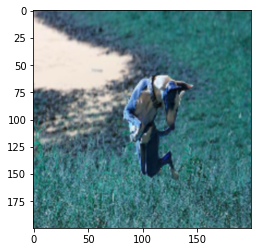

0.9940553 56 irish_setter


In [44]:
# check predict
n_check = random.randint(0, len(x_test_raw)-1)
plt.imshow(x_test_raw[n_check], cmap = 'gray', interpolation = 'bicubic')
plt.show()
pre = model.predict(np.array([x_test_raw[n_check]]))
arg_max = np.argmax(pre)
print(np.max(pre), arg_max, csv_test.columns.values[arg_max+1])